Accuracy: 1.0
Predictions: ['yes' 'yes' 'no']


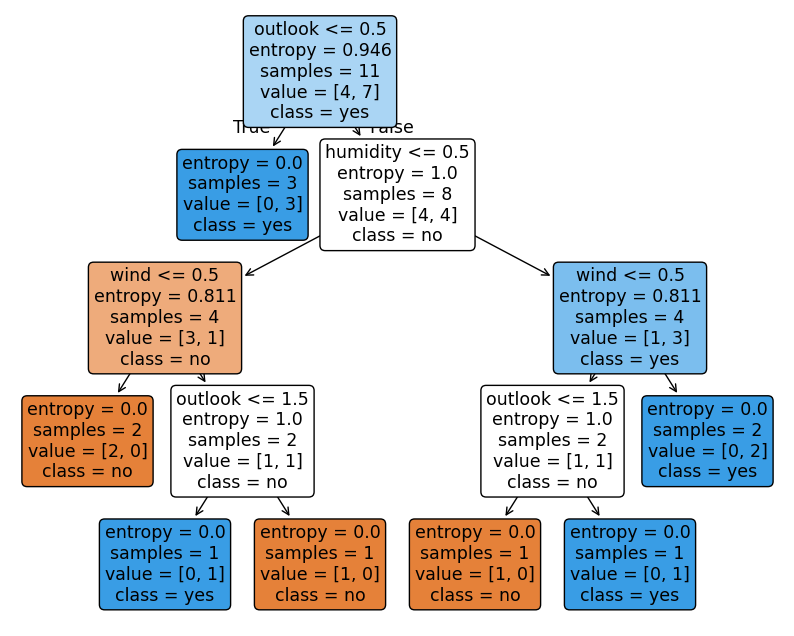

In [2]:
#Decision Tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the Play Tennis dataset as a DataFrame
data = {
    'outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'temperature': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'wind': ['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong'],
    'play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Encode categorical features to numeric
label_encoders = {}
for column in ['outlook', 'temperature', 'humidity', 'wind', 'play']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target
X = df[['outlook', 'temperature', 'humidity', 'wind']]
y = df['play']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)



 # Make predictions
y_pred = clf.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Show predictions on test data
print("Predictions:", label_encoders['play'].inverse_transform(y_pred))

# Visualize the decision tree
plt.figure(figsize=(10,8))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['play'].classes_, filled=True, rounded=True)
plt.show()

Predicted class: Normal


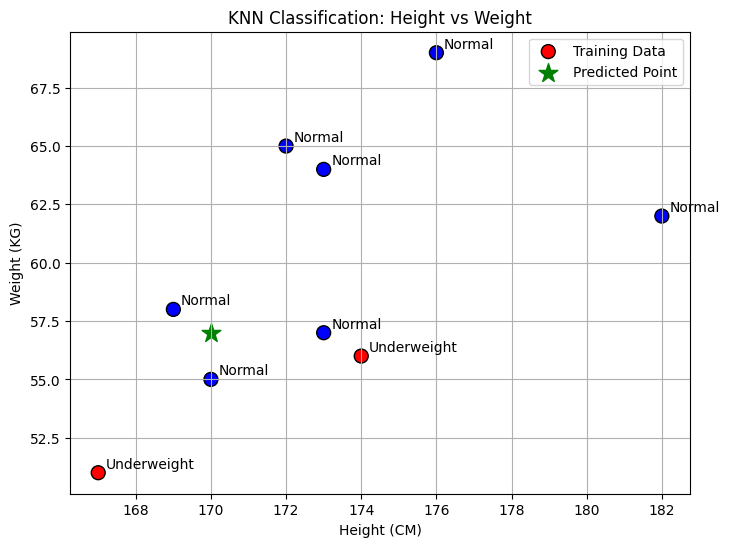

In [3]:
#KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Prepare dataset: Height (cm), Weight (kg), Class (0=Underweight, 1=Normal)
X = np.array([
    [167, 51],
    [182, 62],
    [176, 69],
    [173, 64],
    [172, 65],
    [174, 56],
    [169, 58],
    [173, 57],
    [170, 55]
])
y = np.array([0, 1, 1, 1, 1, 0, 1, 1, 1])

# Fit KNN model (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Predict for new data point
new_point = np.array([[170, 57]])
pred = knn.predict(new_point)[0]

labels = {0: 'Underweight', 1: 'Normal'}
print(f"Predicted class: {labels[pred]}")

# Visualization
plt.figure(figsize=(8,6))

# Plot training points
colors = ['blue' if label == 1 else 'red' for label in y]
plt.scatter(X[:,0], X[:,1], c=colors, s=100, edgecolors='k', label='Training Data')

# Plot new point
plt.scatter(new_point[0,0], new_point[0,1], c='green', s=200, marker='*', label='Predicted Point')



 # Annotate datapoints
for i, txt in enumerate(y):
    plt.annotate(labels[txt], (X[i,0]+0.2, X[i,1]+0.2))

plt.xlabel("Height (CM)")
plt.ylabel("Weight (KG)")
plt.title("KNN Classification: Height vs Weight")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
#Naive Bayes Classifier
# Tennis dataset
data = [
    ["Rainy", "Hot", "High", False, "No"],
    ["Rainy", "Hot", "High", True, "No"],
    ["Overcast", "Hot", "High", False, "Yes"],
    ["Sunny", "Mild", "High", False, "Yes"],
    ["Sunny", "Cool", "Normal", False, "Yes"],
    ["Sunny", "Cool", "Normal", True, "No"],
    ["Overcast", "Cool", "Normal", True, "Yes"],
    ["Rainy", "Mild", "High", False, "No"],
    ["Rainy", "Cool", "Normal", False, "Yes"],
    ["Sunny", "Mild", "Normal", False, "Yes"],
    ["Rainy", "Mild", "Normal", True, "Yes"],
    ["Overcast", "Mild", "High", True, "Yes"],
    ["Overcast", "Hot", "Normal", False, "Yes"],
    ["Sunny", "Mild", "High", True, "No"]
]

# Function to calculate probability P(feature=value | class)
def cond_prob(feature_index, value, target_class):
    class_rows = [row for row in data if row[-1] == target_class]
    count_feature = sum(1 for row in class_rows if row[feature_index] == value)
    return count_feature / len(class_rows) if len(class_rows) > 0 else 0

# Function to get prior probability P(class)
def prior_prob(target_class):


     return sum(1 for row in data if row[-1] == target_class) / len(data)

# Naive Bayes prediction
def predict_nb(outlook, temp, humidity, wind):
    classes = ["Yes", "No"]
    posteriors = {}

    for cls in classes:
        prob = prior_prob(cls)
        prob *= cond_prob(0, outlook, cls)
        prob *= cond_prob(1, temp, cls)
        prob *= cond_prob(2, humidity, cls)
        prob *= cond_prob(3, wind, cls)
        posteriors[cls] = prob

    # Normalize
    total = sum(posteriors.values())
    for cls in posteriors:
        posteriors[cls] /= total

    # Return prediction
    prediction = max(posteriors, key=posteriors.get)
    return prediction, posteriors

if __name__ == "__main__":
    # Taking inputs from the user
    outlook = input("Enter Outlook (Sunny/Rainy/Overcast): ").title()
    temp = input("Enter Temperature (Hot/Mild/Cool): ").title()
    humidity = input("Enter Humidity (High/Normal): ").title()
    wind_input = input("Is it Windy? (True/False): ").capitalize()
    wind = True if wind_input == "True" else False

    # Predict
    prediction, probs = predict_nb(outlook, temp, humidity, wind)
    print(f"\nPrediction: Play Tennis? {prediction}")
    print(f"P(Yes|X) = {probs['Yes']:.4f}")
    print(f"P(No|X) = {probs['No']:.4f}")

Enter Outlook (Sunny/Rainy/Overcast): sunny
Enter Temperature (Hot/Mild/Cool): hot
Enter Humidity (High/Normal): normal
Is it Windy? (True/False): false

Prediction: Play Tennis? Yes
P(Yes|X) = 0.8224
P(No|X) = 0.1776


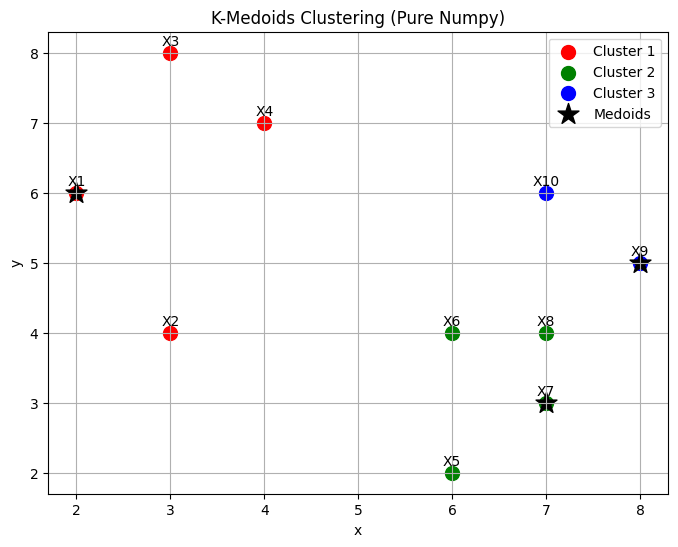

In [5]:
#K-Medoids
import numpy as np
import matplotlib.pyplot as plt
from random import sample

def kmedoids(X, k, max_iter=100):
    m, n = X.shape
    # Randomly initialize medoids
    medoid_idxs = sample(range(m), k)
    medoids = X[medoid_idxs]
    labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - medoids, axis=2), axis=1)
    for it in range(max_iter):
        old_medoids = medoids.copy()
        for idx in range(k):
            # Points in this cluster
            cluster_points = X[labels == idx]
            if len(cluster_points) == 0: continue  # Skip empty clusters
            # Compute new medoid
            distances = np.sum(np.linalg.norm(cluster_points[:, None] - cluster_points, axis=2), axis=1)
            min_index = np.argmin(distances)
            medoids[idx] = cluster_points[min_index]
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - medoids, axis=2), axis=1)
        if np.all(old_medoids == medoids):
            break
    return medoids, labels

# Data
X = np.array([[2, 6], [3, 4], [3, 8], [4, 7], [6, 2], [6, 4], [7, 3], [7, 4], [8, 5], [7, 6]])

# K-Medoids
k = 3
medoids, labels = kmedoids(X, k)




# Plotting
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i in range(k):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(medoids[:, 0], medoids[:, 1], s=250, marker='*', c='black', label='Medoids')

for i, (x, y) in enumerate(X):
    plt.annotate(f'X{i+1}', (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('K-Medoids Clustering (Pure Numpy)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Cluster assignments:
Cluster 1: ['A3', 'B2', 'B3']
Cluster 2: ['A1', 'B1', 'C2']
Cluster 3: ['A2', 'C1']


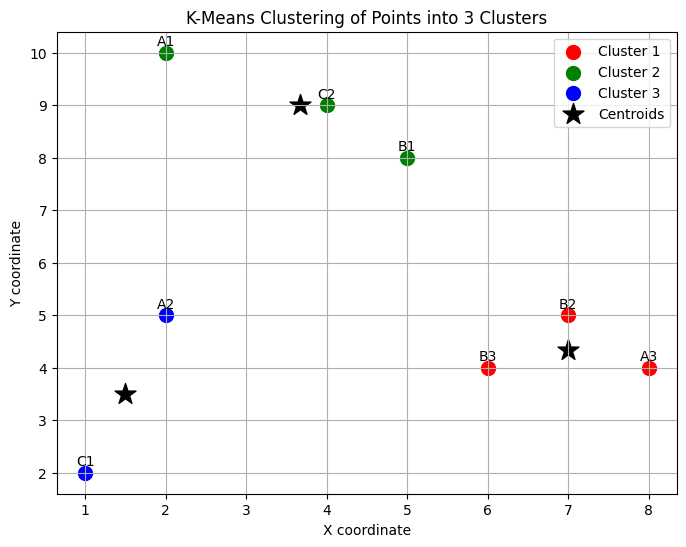

In [8]:
#K-Means
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the points with labels for clarity; labels won't be used in clustering
points = {
    'A1': (2, 10),
    'A2': (2, 5),
    'A3': (8, 4),
    'B1': (5, 8),


     'B2': (7, 5),
    'B3': (6, 4),
    'C1': (1, 2),
    'C2': (4, 9)
}

# Extract just the coordinates for clustering
X = np.array(list(points.values()))

# Create the KMeans model for 3 clusters, using Euclidean distance (default)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Output the cluster assignments
labels = kmeans.labels_

# Map cluster assignment to point labels
results = {label: [] for label in range(3)}
for point_label, cluster_label in zip(points.keys(), labels):
    results[cluster_label].append(point_label)

print("Cluster assignments:")
for cluster_id, point_labels in results.items():
    print(f"Cluster {cluster_id + 1}: {point_labels}")

# Plotting the points colored by cluster
plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']
for i in range(3):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], s=250, marker='*', c='k', label='Centroids')

# Annotate points
for point_label, (x, y) in points.items():
    plt.annotate(point_label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('K-Means Clustering of Points into 3 Clusters')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.grid(True)
plt.show()

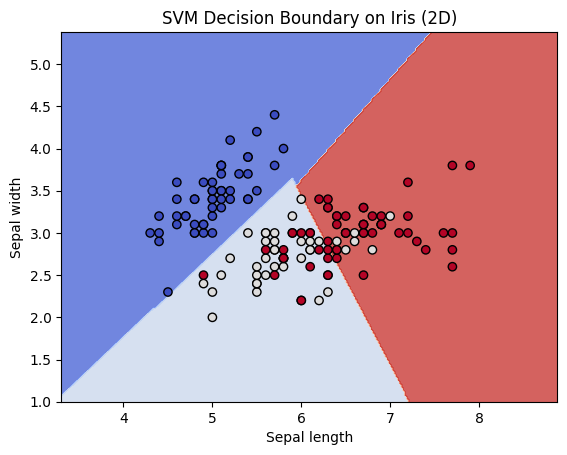

In [9]:
#Support Vector Machines
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only use the first two features for 2D visualization
y = iris.target

# Train an SVM with a linear kernel
clf = SVC(kernel='linear')
clf.fit(X, y)

# Calculate decision boundary mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                      np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary on Iris (2D)')
plt.show()